In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,A Lélek órása,1923
1,Aizaugusa gravi viegli krist,1986
2,Agliyorum,1988
3,0_1_0,2008
4,97 fung lau mung,1994


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


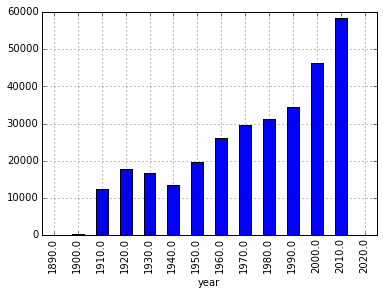

In [29]:
# Using groupby(), plot the number of films
# that have been released each decade in the history of cinema.

t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

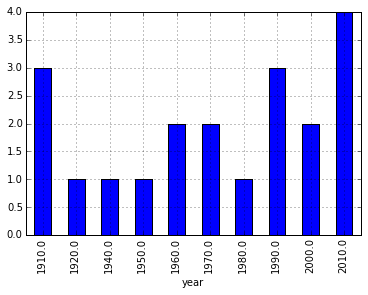

In [30]:
# Use groupby() to plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

In [25]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      744
      actress    351
1951  actor      766
      actress    365
1952  actor      751
      actress    359
1953  actor      785
      actress    377
1954  actor      767
      actress    398
1955  actor      764
      actress    345
1956  actor      800
      actress    401
1957  actor      920
      actress    394
1958  actor      872
      actress    392
1959  actor      881
      actress    383
dtype: int64

In [27]:
# In 1950s, how many roles were available to actors, and how many to actresses,
# for each `n` number 1 through 5?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n < 6]
c.groupby(['n', 'type']).size()

n  type   
1  actor      8050
   actress    3765
2  actor      5632
   actress    5543
3  actor      6747
   actress    3920
4  actor      6695
   actress    3568
5  actor      6661
   actress    3199
dtype: int64

In [46]:
# Use groupby() to determine how many roles are listed
# for each of the Pink Panther movies.

c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort('n').groupby(['year'])[['n']].max()
c

,n
year,
1963,15
2006,50


In [53]:
# Across all of the movies named "Hamlet",
# how many times has each role been ranked n=1?

c = cast
c = c[c.title == 'Hamlet']
c = c[c.n == 1]
c = c.groupby(['character']).size()
c

character
Attendant to Claudius    1
Claudius                 1
Francisco                1
Hamlet                   9
Ophelia                  1
Polonius                 1
dtype: int64

In [60]:
# Across all of the movies named "Hamlet",
# how many times has each role receieved
# any of the three ranks n=1 through n=3?

c = cast
c = c[c.title == 'Hamlet']
c = c[c.n <= 3]
c = c.groupby(['character', 'n']).size()
c

character              n
Attendant to Claudius  1    1
                       3    1
Bernardo               2    1
Claudius               1    1
                       2    3
                       3    5
English Ambassador     2    1
Francisco              1    1
Gertrude               2    4
                       3    3
Ghost                  2    1
                       3    1
Gravedigger            3    1
Hamlet                 1    9
                       2    1
Horatio                3    1
König Hamlet           2    1
Königin Gertrude       3    1
Marcellus              3    1
Ophelia                1    1
                       2    2
Player King            3    1
Polonius               1    1
                       2    1
dtype: int64

In [109]:
c = cast
#c = c[c.character.str.startswith('Z')]
c = c.groupby('character').n.agg(['min', 'max'])
d = c['max'] - c['min']
d = d[d.notnull()]
d.order().tail()

character
Spaghetti Spectator      901
Matty                    998
Henry                    998
Erica                    998
Selma Davis            33606
dtype: float64